mais antigo no meio

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r'bio.csv')
#df.columns
#df.set_index('id', inplace=True)
#df
df

,id,nome,inicio,fim,antepassado
0,1,A,16,14,NaN
1,2,B,15,12,0
2,3,C,14,13,0
3,4,D,13,10,0
4,5,E,13,10,3
5,6,F,13,12,3
6,7,G,8,7,[2 5]
7,8,H,13,0,3
8,9,I,7,3,7
9,10,J,5,2,9


In [2]:
nome = df['nome'].to_list()
origem = df['inicio'].to_list()
extinção = df['fim'].to_list()
id_ = df['id'].to_list()

In [3]:
tree_data = []
for i in range(len(nome)):    
    tree_data.append([nome[i], -origem[i], -extinção[i], i, id_[i]])
for es in tree_data:
    print(es)

['A', -16, -14, 0, 1]
['B', -15, -12, 1, 2]
['C', -14, -13, 2, 3]
['D', -13, -10, 3, 4]
['E', -13, -10, 4, 5]
['F', -13, -12, 5, 6]
['G', -8, -7, 6, 7]
['H', -13, 0, 7, 8]
['I', -7, -3, 8, 9]
['J', -5, -2, 9, 10]
['K', -4, 0, 10, 11]
['L', -15, -13, 11, 12]
['M', -16, -11, 12, 13]
['N', -11, -9, 13, 14]


algoritmo de ordenação, sera exibido nesta ordem

In [4]:
def sort_func2(item):
    return item[1]
def tree_ord(tree_list):
    
    tree_list.sort(key=sort_func2)
    tree_list_ord = []
    aux = False
    
    while len(tree_list) >= 1:
        
        if aux:
            
            tree_list_ord.insert(0, tree_list.pop(0)) #remove o index 0 e adiciona no inicio
            aux = False
        else:
            tree_list_ord.append(tree_list.pop(0))
            aux = True
            
    return tree_list_ord

In [5]:
tree_data = tree_ord(tree_data)

In [6]:
x = []
origem = []
extinção = []
nome = []
id_ = []
for i in range(len(tree_data)):  
    nome.append(tree_data[i][0])
    origem.append(tree_data[i][1])
    extinção.append(tree_data[i][2])
    x.append(i)
    id_.append(tree_data[i][4])

In [7]:
print(nome)
print(origem)
print(extinção)
print(x)
print(id_)

['K', 'I', 'N', 'F', 'D', 'L', 'M', 'A', 'B', 'C', 'E', 'H', 'G', 'J']
[-4, -7, -11, -13, -13, -15, -16, -16, -15, -14, -13, -13, -8, -5]
[0, -3, -9, -12, -10, -13, -11, -14, -12, -13, -10, 0, -7, -2]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[11, 9, 14, 6, 4, 12, 13, 1, 2, 3, 5, 8, 7, 10]


In [8]:
df = pd.read_csv(r'bio-relate.csv')
df = df.dropna().reset_index(drop=True)
df

,D-ID,O-ID
0,2,1.0
1,3,1.0
2,4,1.0
3,5,3.0
4,6,3.0
5,7,2.0
6,7,5.0
7,8,3.0
8,9,7.0
9,10,9.0


In [9]:
'''nome = np.array(nome)
origem = np.array(origem)
extinção = np.array(extinção)
x = np.array(x)
id_ = np.array(id_)'''
print(tree_data[7])
print(tree_data[8])

['A', -16, -14, 0, 1]
['B', -15, -12, 1, 2]


In [10]:
O = df['O-ID'].to_list()
D = df['D-ID'].to_list()

x_o = []
x_d = []
y_l = []
dy= []

tree_r_data = []
for i in range(len(O)):    
    tree_r_data.append([O[i], D[i]])
for es in tree_r_data:
    
    '''print(es)
    print(id_.index(es[0]))
    print(id_.index(es[1]))'''
    
    ori = id_.index(es[0])
    des = id_.index(es[1])
    
    '''print(nome[ori])
    print(nome[des])'''
    
    
    x_o.append(x[ori])
    x_d.append(x[des])
    
    dy.append(0)
    
    y_l.append(origem[des])
    
'''    print(x[des])
    print(origem[des])
    
    print(x[ori])
    print(origem[des])
    print('----------------------')
    
    x_o | (x_o-x_d)
    y_l | 0
    
    
    y_l2 = np.concatenate((y_l,y_l))
    '''

"    print(x[des])\n    print(origem[des])\n    \n    print(x[ori])\n    print(origem[des])\n    print('----------------------')\n    \n    x_o | (x_o-x_d)\n    y_l | 0\n    \n    \n    y_l2 = np.concatenate((y_l,y_l))\n    "

In [11]:
# [x1 , x2]
# [y1 , y2]
origem = np.array(origem)
extinção = np.array(extinção)
x = np.array(x)

y_values_l = [y_l, y_l]
x_values_l = [x_o, x_d]

x_o = np.array(x_o)
y_l = np.array(y_l)
x_d = np.array(x_d)

y_values_l = np.array(y_values_l)
x_values_l = np.array(x_values_l)
y_l2 = np.concatenate((y_l,y_l))

y_values = [origem, extinção]
x_values = [x,      x]
print(len(y_l2))

26


x_o | (x_o-x_d)
y_l | 0
    
y_l2 = np.concatenate((y_l,y_l))

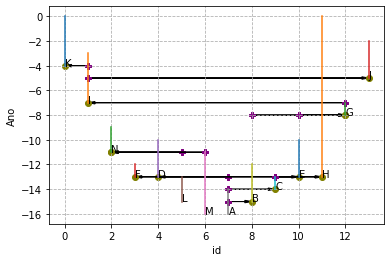

In [12]:
#printando com o algoritmo de antigo primeiro
for i in range(len(origem)):
    plt.annotate(str(nome[i]), (x[i], origem[i]))

plt.plot(x_values, y_values)
#plt.plot(x_values_l, y_values_l)

colo = ['blue', 'orange', 'green', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'black']

colo = colo + colo + colo + colo +colo +colo +colo +colo +colo 


for i in range(len(x_o)):
    plt.arrow(x_o[i], y_l2[i], x_d[i]-x_o[i], dy[i], length_includes_head=True, head_width=0.2, color='black')
    plt.scatter(x_o[i],y_l2[i], marker='P',color='purple')#saida
    plt.scatter(x_o[i]+x_d[i]-x_o[i], y_l2[i]+dy[i] , marker='o',color='olive')#entrada
    
    

plt.xlabel("id")
plt.ylabel("Ano")
plt.grid(which='both', linestyle='--')
plt.show()